# IRIS Flower Classification

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

Ignoring Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
df = pd.read_csv('D:\intern\Project 1\Iris Flower - Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Performing EDA

In [12]:
figures = []
iris_cleaned = df.drop(columns="Id")

Correlation Heatmap

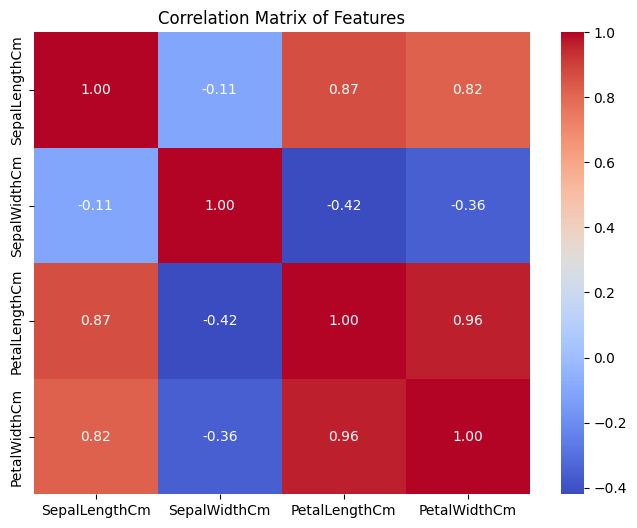

In [13]:
numeric_columns = iris_cleaned.select_dtypes(include=["float64", "int64"])
numeric_columns = numeric_columns.fillna(numeric_columns.mean())
correlation_matrix = numeric_columns.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
ax.set_title('Correlation Matrix of Features')
plt.show()

Histograms for numeric features

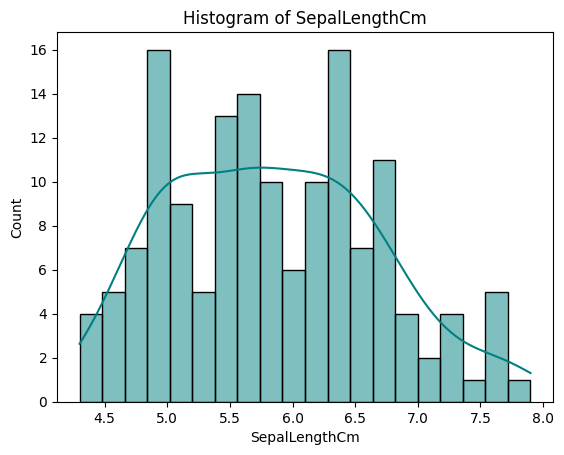

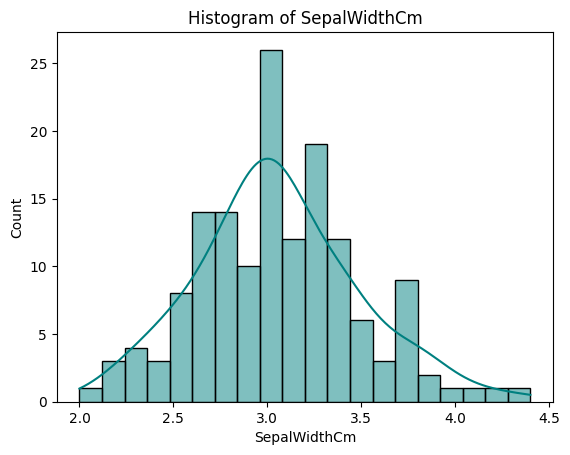

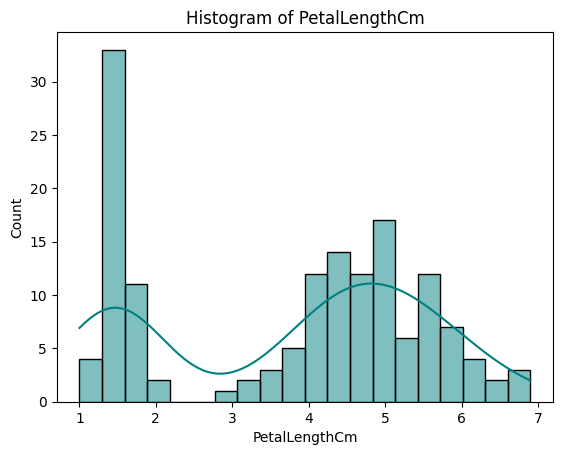

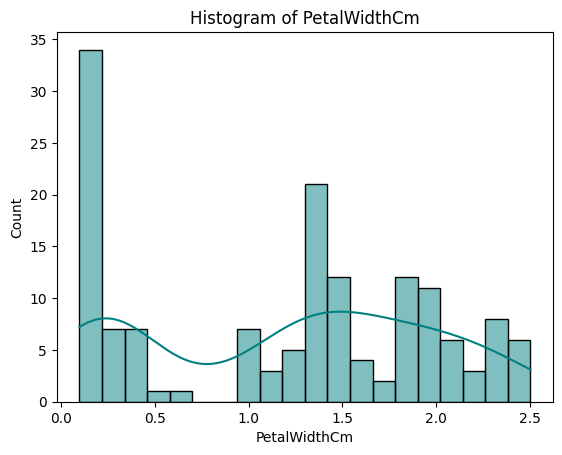

In [14]:
for column in iris_cleaned.columns[:-1]:
    fig, ax = plt.subplots()
    sns.histplot(iris_cleaned[column], kde=True, bins=20, ax=ax, color='teal')
    ax.set_title(f'Histogram of {column}')
    figures.append(fig)

KDE plots for numeric features

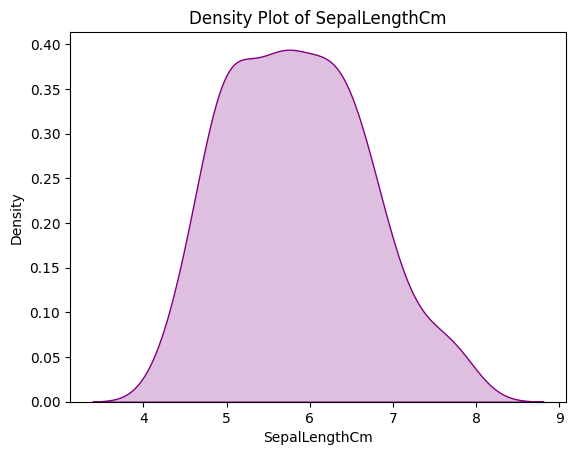

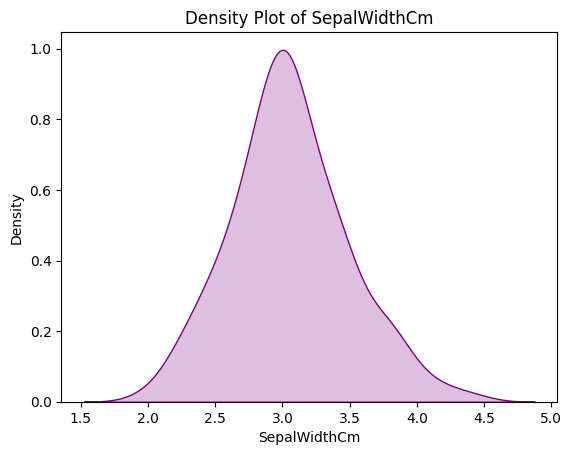

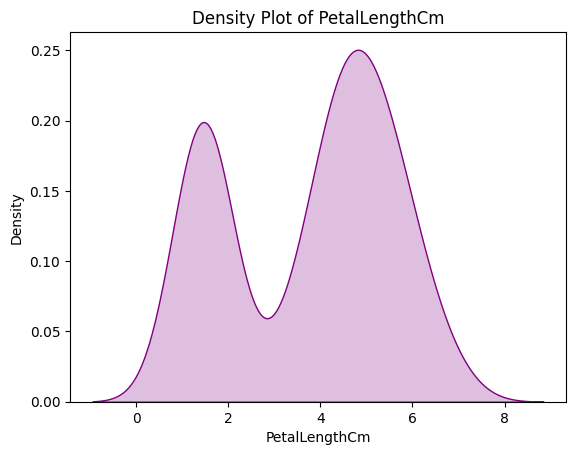

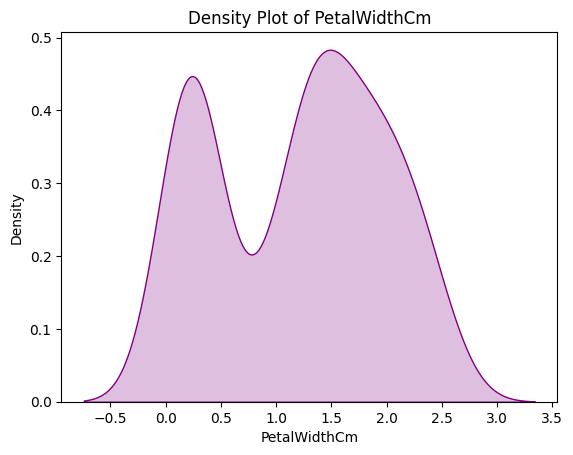

In [15]:
for column in iris_cleaned.columns[:-1]:
    fig, ax = plt.subplots()
    sns.kdeplot(iris_cleaned[column], fill=True, ax=ax, color='purple')
    ax.set_title(f'Density Plot of {column}')
    figures.append(fig)

Pairplot of all features

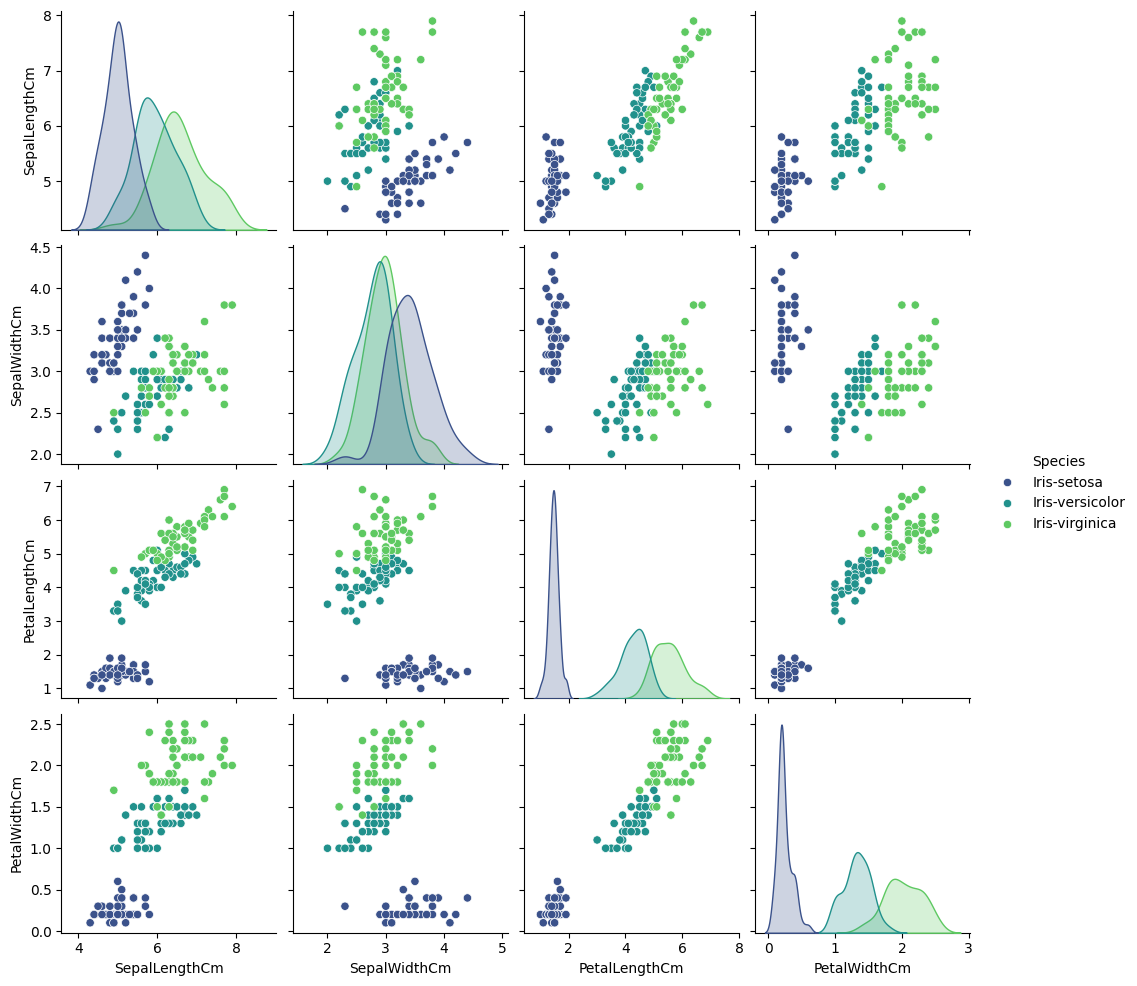

In [16]:
fig = sns.pairplot(iris_cleaned, hue="Species", diag_kind="kde", palette="viridis")
figures.append(fig.fig)

Boxplots for each feature by species

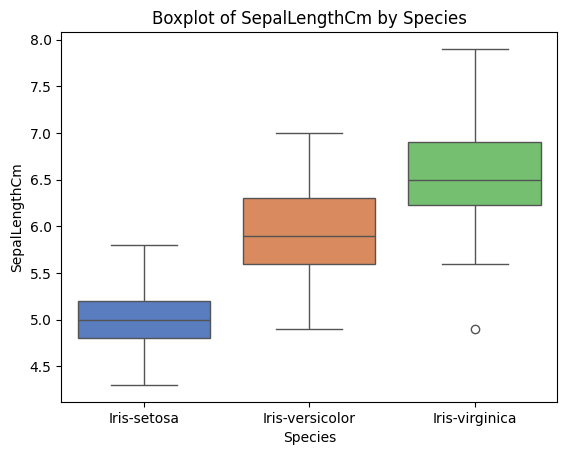

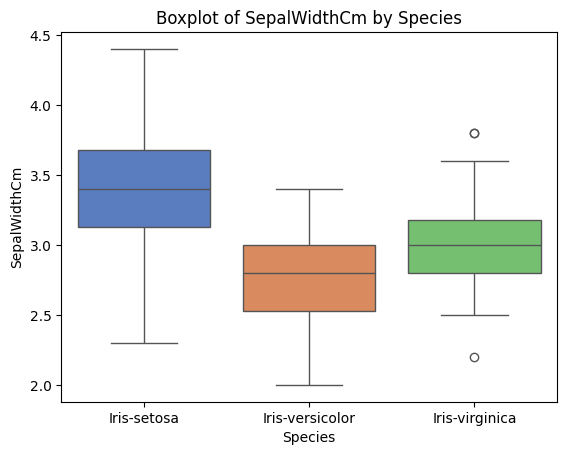

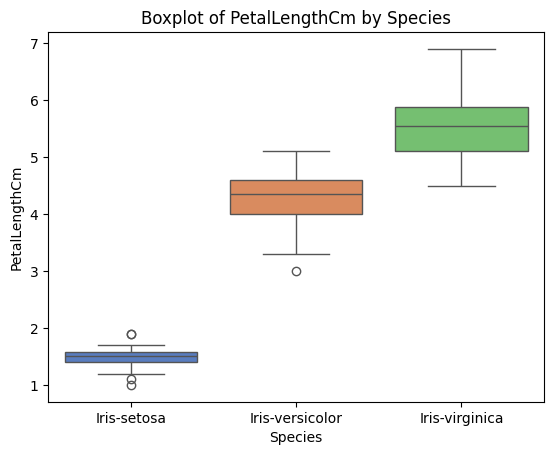

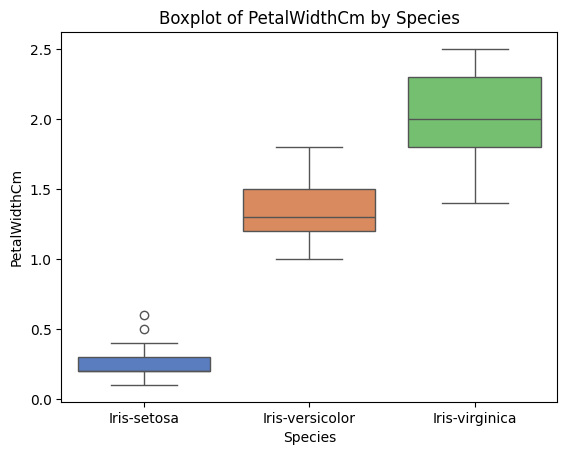

In [17]:
for column in iris_cleaned.columns[:-1]:
    fig, ax = plt.subplots()
    sns.boxplot(x="Species", y=column, data=iris_cleaned, palette="muted", ax=ax)
    ax.set_title(f'Boxplot of {column} by Species')
    figures.append(fig)

Violin plots for each feature by species

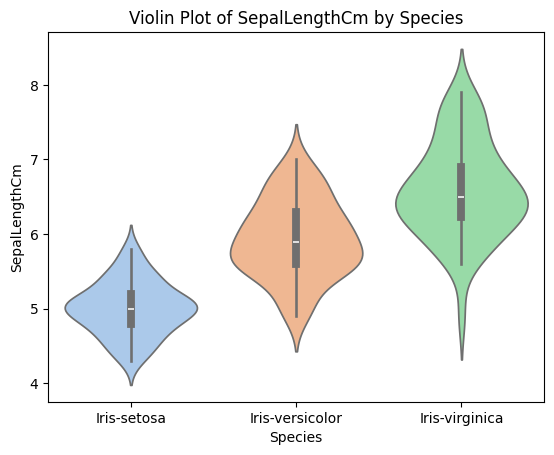

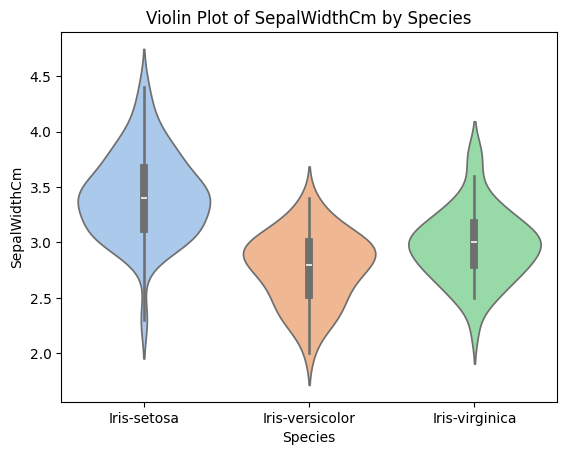

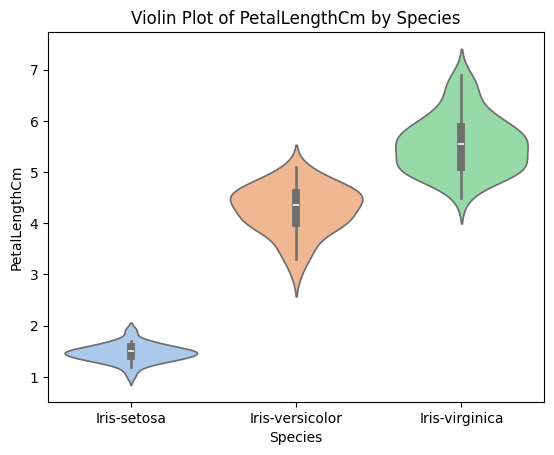

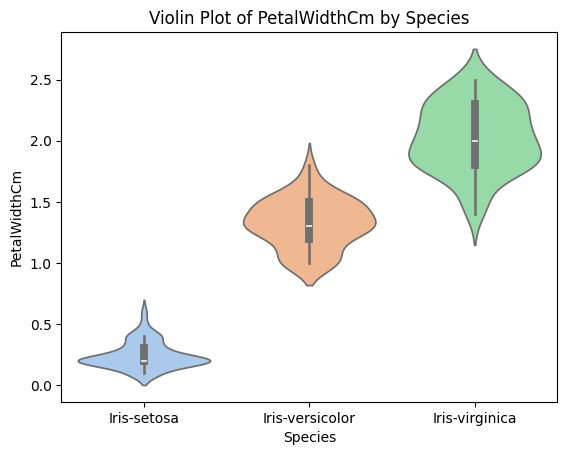

In [18]:
for column in iris_cleaned.columns[:-1]:
    fig, ax = plt.subplots()
    sns.violinplot(x="Species", y=column, data=iris_cleaned, palette="pastel", ax=ax)
    ax.set_title(f'Violin Plot of {column} by Species')
    figures.append(fig)

Swarmplots for feature clustering by species

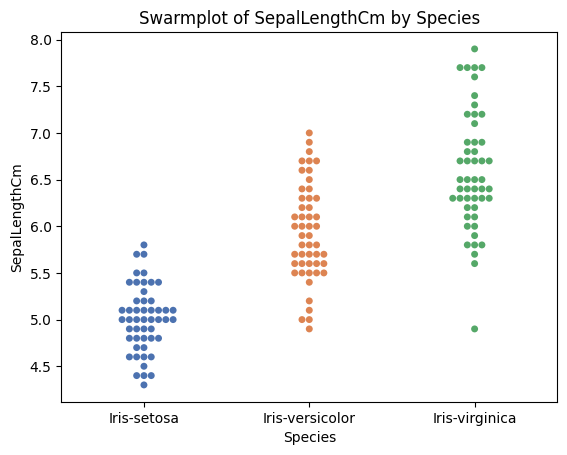

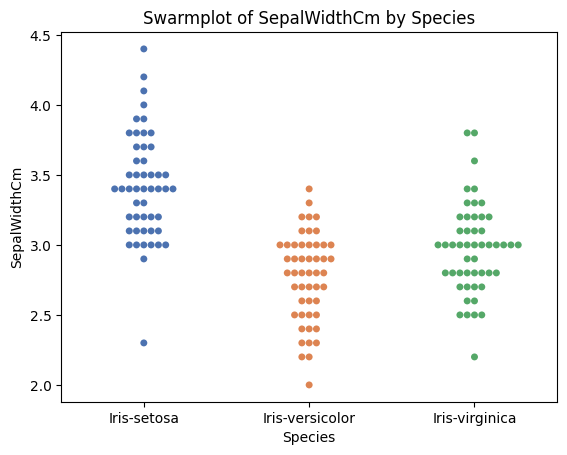

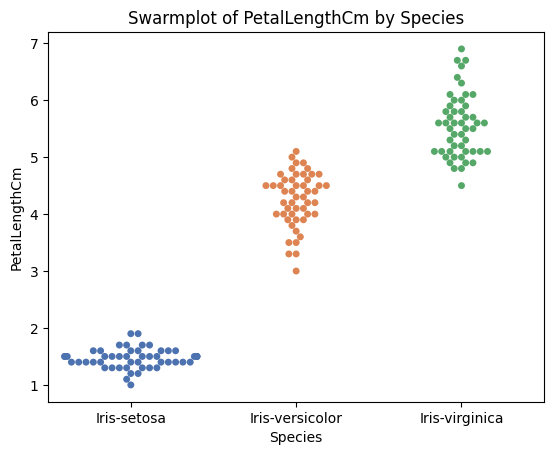

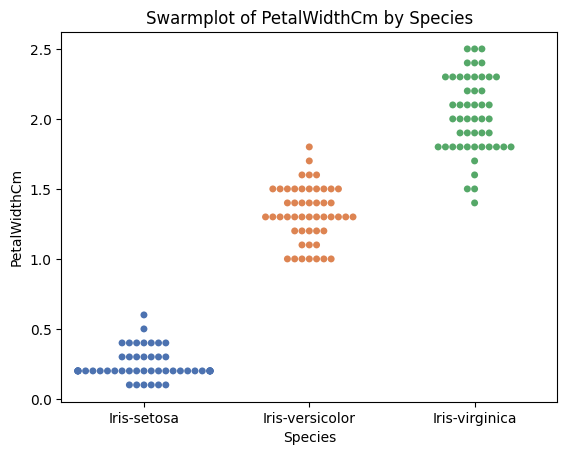

In [19]:
for column in iris_cleaned.columns[:-1]:
    fig, ax = plt.subplots()
    sns.swarmplot(x="Species", y=column, data=iris_cleaned, palette="deep", ax=ax)
    ax.set_title(f'Swarmplot of {column} by Species')
    figures.append(fig)

3D Scatter Plot

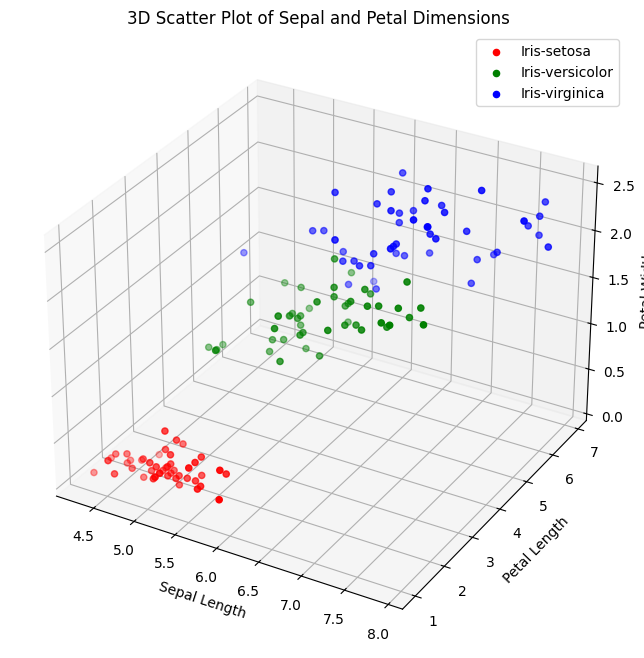

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
species_colors = {"Iris-setosa": 'r', "Iris-versicolor": 'g', "Iris-virginica": 'b'}
for species in iris_cleaned['Species'].unique():
    subset = iris_cleaned[iris_cleaned['Species'] == species]
    ax.scatter(subset["SepalLengthCm"], subset["PetalLengthCm"], subset["PetalWidthCm"],
               label=species, color=species_colors[species])
ax.set_title("3D Scatter Plot of Sepal and Petal Dimensions")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Petal Length")
ax.set_zlabel("Petal Width")
ax.legend()
figures.append(fig)

2D KDE Plot for two features

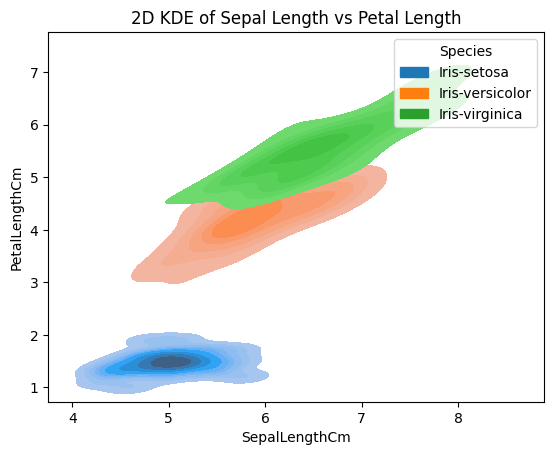

In [21]:
fig, ax = plt.subplots()
sns.kdeplot(x="SepalLengthCm", y="PetalLengthCm", data=iris_cleaned, hue="Species", fill=True, ax=ax)
ax.set_title("2D KDE of Sepal Length vs Petal Length")
figures.append(fig)

KMeans Clustering Visualization

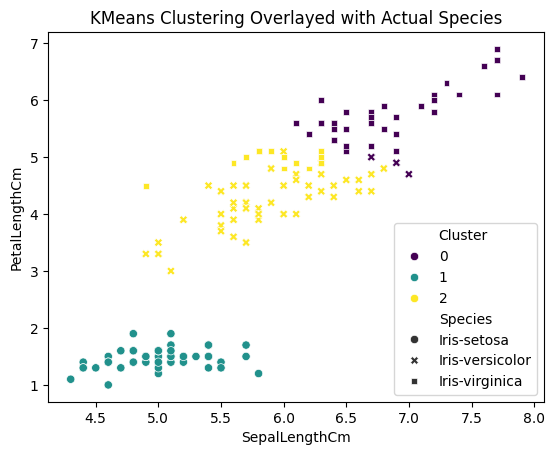

In [22]:
X = iris_cleaned.iloc[:, :-1].values  # Feature matrix
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
iris_cleaned['Cluster'] = kmeans.labels_

fig, ax = plt.subplots()
sns.scatterplot(x="SepalLengthCm", y="PetalLengthCm", hue="Cluster", style="Species",
                palette="viridis", data=iris_cleaned, ax=ax)
ax.set_title("KMeans Clustering Overlayed with Actual Species")
figures.append(fig)

In [23]:
# Label encode the target 'Species' column
label_encoder = LabelEncoder()
iris_cleaned['Species'] = label_encoder.fit_transform(iris_cleaned['Species'])

# Splitting the data into features and target variable
X = iris_cleaned.drop('Species', axis=1)
y = iris_cleaned['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression:
Accuracy: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



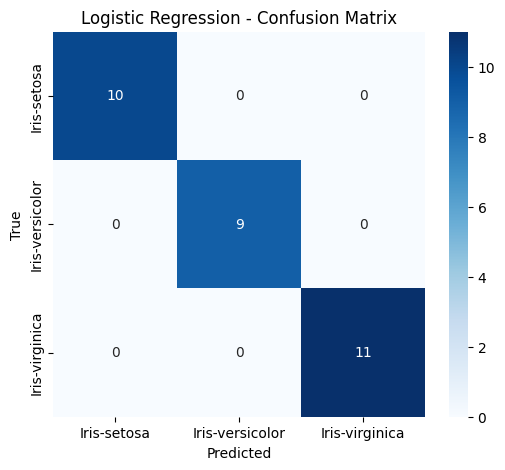


K-Nearest Neighbors:
Accuracy: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



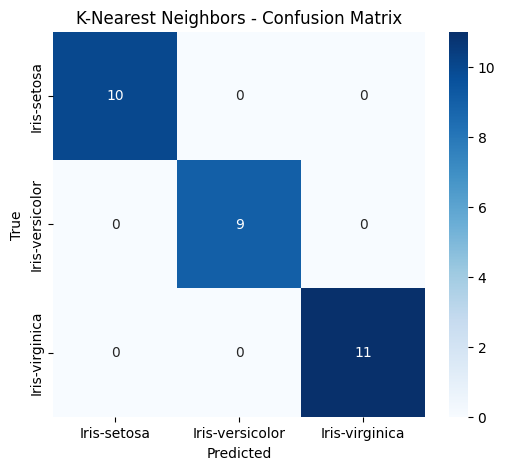


Support Vector Machine:
Accuracy: 0.97
F1 Score: 0.97
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



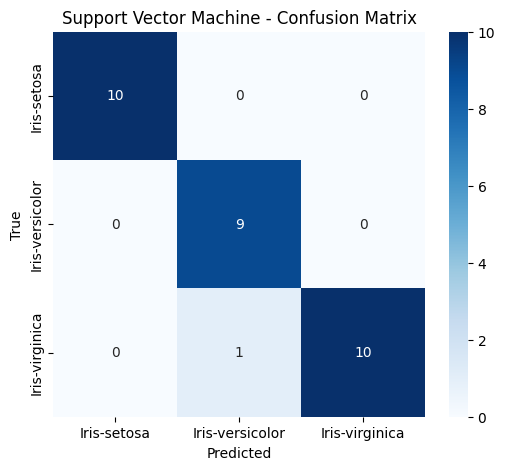


Decision Tree:
Accuracy: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



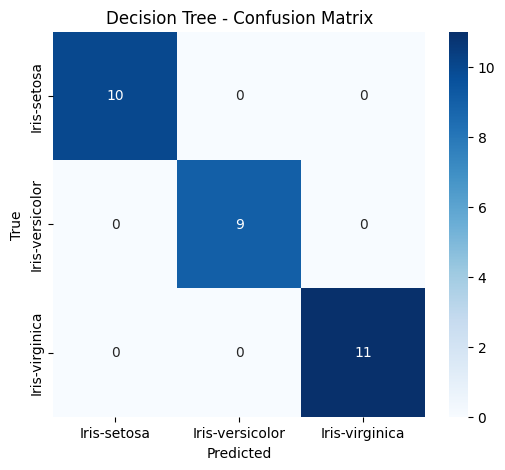


Random Forest:
Accuracy: 1.00
F1 Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



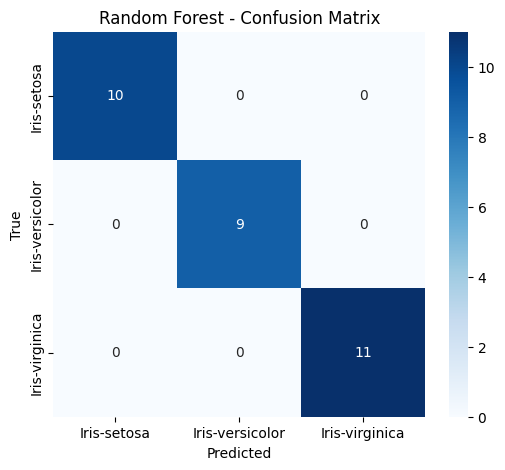

In [24]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to store results
results = {}

# Train each model, make predictions, and evaluate performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # F1 score with weighted averaging
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }
    
    # Print evaluation metrics
    print(f"\n{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
